# EDA

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('C:/Users/azdra/Documents/School/KU Leuven/Modern Data Analytics/mda_project/code/out/merged.csv')
# Dropping redundant and duplicate columns
data = data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'ARRON', 'N_MASK', 'COD_y', 'COD_x'], axis = 1)
# Dropping ~1000 rows where NaN was present due to lack of population data
data = data.dropna(axis = 0)
print(data)

       YEAR  N_DEATHS  WEEK  population_t YEAR_WEEK  NIS_Code  \
0      2000      31.0     1      932103.0  2000-001   11000.0   
1      2000      10.0     1      305670.0  2000-001   12000.0   
2      2000      14.0     1      406199.0  2000-001   13000.0   
3      2000      43.0     1      959318.0  2000-001   21000.0   
4      2000      14.0     1      558220.0  2000-001   23000.0   
...     ...       ...   ...           ...       ...       ...   
45508  2019      13.0    52       63748.0  2019-052   84000.0   
45509  2019       6.0    52       54124.0  2019-052   85000.0   
45510  2019      20.0    52      111275.0  2019-052   91000.0   
45511  2019      62.0    52      318183.0  2019-052   92000.0   
45512  2019       8.0    52       66316.0  2019-052   93000.0   

       Nom_arrondissement  heatwave_week_boolean  
0               Antwerpen                    0.0  
1                Mechelen                    0.0  
2                Turnhout                    0.0  
3      Bruxelle

In [3]:
data.describe()

,YEAR,N_DEATHS,WEEK,population_t,NIS_Code,heatwave_week_boolean
count,44343.000000,44343.000000,44343.000000,4.434300e+04,44343.000000,44343.000000
mean,2009.477257,44.175225,26.676071,2.535992e+05,51041.742778,0.104188
std,5.757857,40.203413,15.004719,2.335067e+05,22783.558055,0.305507
min,2000.000000,4.000000,1.000000,4.057400e+04,11000.000000,0.000000
25%,2004.000000,16.000000,14.000000,8.275600e+04,34000.000000,0.000000
50%,2009.000000,32.000000,27.000000,1.864890e+05,51000.000000,0.000000
75%,2014.000000,57.000000,40.000000,3.174075e+05,71000.000000,0.000000
max,2019.000000,317.000000,53.000000,1.217888e+06,93000.000000,1.000000


Creating datetime column *year_week_ts*:

In [4]:
from datetime import datetime

def year_week(y, w):
    return datetime.strptime(f'{y} {w} 1', '%G %V %u')

data['year_week_ts'] = data.apply(lambda row: year_week(row.YEAR, row.WEEK), axis=1)
print(data)

       YEAR  N_DEATHS  WEEK  population_t YEAR_WEEK  NIS_Code  \
0      2000      31.0     1      932103.0  2000-001   11000.0   
1      2000      10.0     1      305670.0  2000-001   12000.0   
2      2000      14.0     1      406199.0  2000-001   13000.0   
3      2000      43.0     1      959318.0  2000-001   21000.0   
4      2000      14.0     1      558220.0  2000-001   23000.0   
...     ...       ...   ...           ...       ...       ...   
45508  2019      13.0    52       63748.0  2019-052   84000.0   
45509  2019       6.0    52       54124.0  2019-052   85000.0   
45510  2019      20.0    52      111275.0  2019-052   91000.0   
45511  2019      62.0    52      318183.0  2019-052   92000.0   
45512  2019       8.0    52       66316.0  2019-052   93000.0   

       Nom_arrondissement  heatwave_week_boolean year_week_ts  
0               Antwerpen                    0.0   2000-01-03  
1                Mechelen                    0.0   2000-01-03  
2                Turnhout  

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44343 entries, 0 to 45512
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   YEAR                   44343 non-null  int64         
 1   N_DEATHS               44343 non-null  float64       
 2   WEEK                   44343 non-null  int64         
 3   population_t           44343 non-null  float64       
 4   YEAR_WEEK              44343 non-null  object        
 5   NIS_Code               44343 non-null  float64       
 6   Nom_arrondissement     44343 non-null  object        
 7   heatwave_week_boolean  44343 non-null  float64       
 8   year_week_ts           44343 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 3.4+ MB


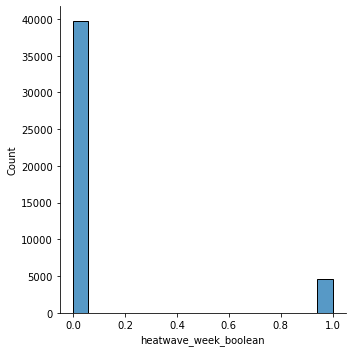

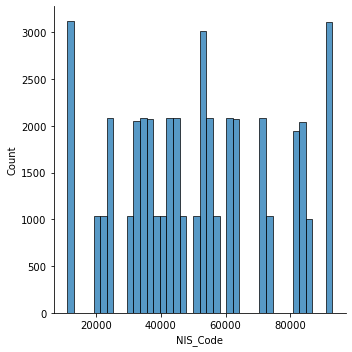

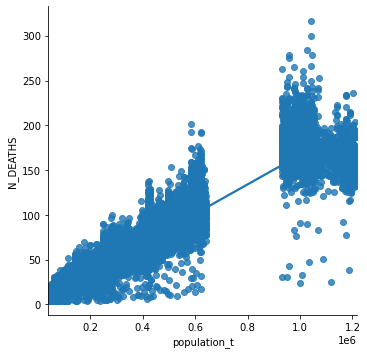

In [6]:
import seaborn as sns

sns.displot(data, x="heatwave_week_boolean")
sns.displot(data, x="NIS_Code")
sns.lmplot(data=data, x="population_t", y="N_DEATHS")


<ipython-input-7-544ed685c06f>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.prop = data['N_DEATHS']/data['population_t']


<AxesSubplot:xlabel='heatwave_week_boolean'>

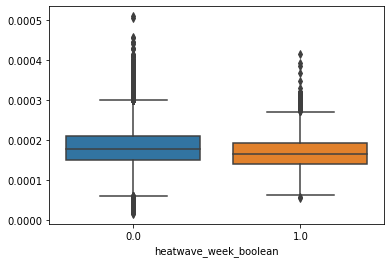

In [7]:
data.prop = data['N_DEATHS']/data['population_t']
sns.boxplot(x="heatwave_week_boolean", y=data.prop, data=data)

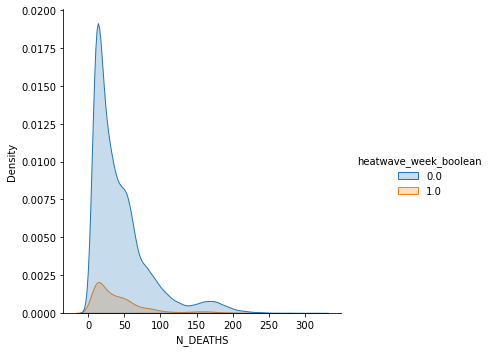

In [8]:
sns.displot(data, x="N_DEATHS", hue="heatwave_week_boolean", kind="kde", fill=True)

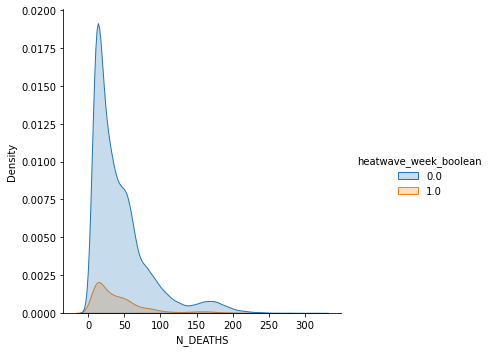

In [9]:
sns.displot(data, x="N_DEATHS", hue="heatwave_week_boolean", kind="kde", fill=True)

# Train/Test Split

In [10]:
X = data.loc[:, ~data.columns.isin(['N_DEATHS', 'Nom_arrondissement', 'YEAR_WEEK', 'year_week_ts'])]
y = data.loc[:, data.columns == 'N_DEATHS']

from sklearn.model_selection import train_test_split

# Splitting our data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Baseline Model


Before we can make and evaluate predictions, we need to establish a baseline, a sensible measure that we hope to beat with our model. If our model cannot improve upon the baseline, then it will be a failure and we should try a different model or admit that machine learning is not right for our problem. The baseline prediction for our case can be the historical max temperature averages. In other words, our baseline is the error we would get if we simply predicted the average max temperature for all days.


In [11]:
# The baseline predictions are the historical averages
baseline_preds = y_train.mean()

# Baseline absolute errors and display average baseline error
baseline_errors = abs(baseline_preds - y_test)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  N_DEATHS    29.49
dtype: float64


# Random Forest Regression

In [12]:
from sklearn.ensemble import RandomForestRegressor
# Fitting a random forest regression to the dataset
model_rf = RandomForestRegressor(n_estimators = 300, random_state = 0)
model_rf.fit(X_train, y_train)

<ipython-input-12-371d84b7b231>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, random_state=0)

In [13]:
# Use the forest's predict method on the test data
predictions = model_rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions.reshape(len(y_test), 1) - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: N_DEATHS    5.81
dtype: float64 degrees.


In [14]:
importances = model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_], axis=0)

In [15]:
feature_names = data.columns
feature_names

Index(['YEAR', 'N_DEATHS', 'WEEK', 'population_t', 'YEAR_WEEK', 'NIS_Code',
       'Nom_arrondissement', 'heatwave_week_boolean', 'year_week_ts'],
      dtype='object')

<BarContainer object of 5 artists>

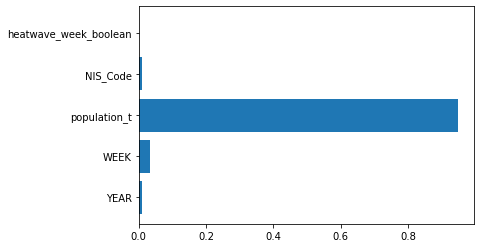

In [16]:
plt.barh(X.columns, model_rf.feature_importances_)

In [17]:
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(model_rf, X_test, y_test)


Text(0.5, 0, 'Permutation Importance')

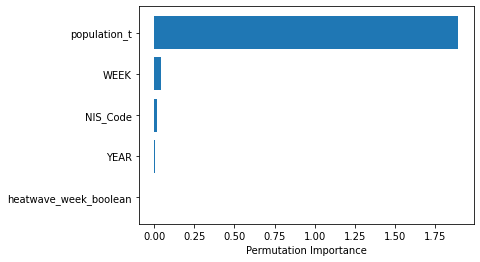

In [18]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
